<a href="https://colab.research.google.com/github/Mary2agonz/colab-cd24/blob/main/ParteII_MarilynGonz%C3%A1lezAguilar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXAMEN DE CERTIFICACIÓN**

Estudiante:

Marilyn González Aguilar
17.720.836-1

enlace github:

----------------------------------


#ANEXO PARTE II – Caso de trabajo 1
-------------------------------------
**Descripción**

Trabajaremos con el famoso caso de “Titanic”, una de las competencias abiertas de Kaggle, donde
se pide que debas predecir si sobreviven o no sobreviven los pasajeros al desastre.

El “Titanic” es un conjunto de datos clásico y muy famoso que se utiliza para el aprendizaje
automático y el análisis de datos. Contiene información sobre los pasajeros, formateada en dos
conjuntos: datos de entrenamiento y de prueba (Train y Test).

El conjunto de entrenamiento incluye información sobre los pasajeros junto con el resultado de
supervivencia, que usaremos para entrenar nuestros modelos de aprendizaje automático. El
conjunto de prueba contiene información sobre los pasajeros, pero sin el resultado de
supervivencia, y se utiliza para probar el rendimiento de nuestros modelos entrenados.


**Descripción de las columnas:**
* Survived: Idica si los pasajeros sobrevivieron (1)
o No (0).
* Pclass: Clase de billete, un indicador del nivel socioeconómico (1 = 1º, 2 = 2º, 3 = 3º).
* Name: Nombre del pasajero.
* Sex: Sexo del pasajero.
* Age: Edad del pasajero en años.
* SibSp: Número de hermanos/cónyuges a bordo de la Titanic.
* Parch: Número de padres/hijos a bordo de la Titanic.
* Ticket: Número del Ticket.
* Fare: Tarifa de pasajero.
* Cabin: Número de cabina.
* Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

--------------------------------
#1) Preparación de los datos


1. Importe las librerías necesarias para trabajar ambos datases, inspeccione los dataset,
comprenda que tienen, como se conforman, tamaños de columnas y filas, cual es el tipo de
datos y realice conclusiones al terminar.
2. Valores perdidos o nulos, escriba una conclusión sobre cuáles fueron sus descubrimientos
de ambos datasets, como los procesará estos datos.
3. Generé gráficos que muestren datos claves, al menos unos 3. Registre conclusiones.
4. Aprendizaje supervisado o Aprendizaje No supervisado: Utilice 2 algoritmos de datos de
cada aprendizaje de máquinas y vea cual entrega mejor rendimiento, con cual se quedaría
y registre sus conclusiones.
5. Modele sus datos, entrene y testee. Entregue sus conclusiones.

Recuerde realizar arreglos, condicionales, funciones, todo lo necesario para realizar esta prueba y
en todo momento comentar y documentar.

----------------------------------------------

#RESPUESTA PREGUNTA N°1



```
1. Importe las librerías necesarias para trabajar ambos datases, inspeccione los dataset,
comprenda que tienen, como se conforman, tamaños de columnas y filas, cual es el tipo de
datos y realice conclusiones al terminar.
```



In [2]:
#Paso 1
#Importo las librerías necesarias para toda la Parte II del Examen
#Pandas para realizar el manejo y darle estructura de dataframe al conjunto de datos, y realizar operaciones matemáticas de analisis de datos
import pandas as pd
#Numpy para realizar operaciones matemáticas en matrices y arreglos
import numpy as np
#Matplotlib.pyplot para realizar los gráficos y figuras
import matplotlib.pyplot as plt
#Seaborn para crear gráficos y figuras más interativos
import seaborn as sns
#Sklearn para realizar análisis de datos y los ejercicios de aprendizaje automático
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.cluster import KMeans
#Warnings para controlar las posibles advertencias emitidas por python en la ejecución del código
import warnings
#Adicionalmente se incluye los "suppress warnings" para que python ignore todas las advertencias que puedan surgir por el uso de ciertas funciones y/o módulos
#Es decir, para que python no muestre mensajes de advertencia durante la ejecución de estas funciones y/o módulos
warnings.filterwarnings('ignore')

In [3]:
#--------------------------------------------------------------------
#Paso 2
#Cargo los archivos csv desde link drive (cargué los archivos del ejercicio a mi drive para acceder a ellos desde link publico)
#Primero el archivo de entrenamiento
train_original = "https://drive.google.com/file/d/1SSGda7Gie4-bsHI7h7uW-gtnPL2agO1k/view?usp=sharing"
file_id = train_original.split("/")[5]
train_mod = f"https://drive.google.com/uc?id={file_id}"
#Después el de testeo
test_original = "https://drive.google.com/file/d/14im-2tQf9SR8jbq4aoYUQSWEhIIZI72X/view?usp=sharing"
file_id = test_original.split("/")[5]
test_mod = f"https://drive.google.com/uc?id={file_id}"

#Creo los "df" para cada conjunto de datos desde los links cargados
df_train = pd.read_csv(train_mod)
df_test = pd.read_csv(test_mod)

In [4]:
#--------------------------------------------------------------------
#Paso 3
#Realizo operaciones básicas sobre los df para realizar la inspección de los dataset
#Primero sobre el df de entrenamiento
#Op1:Mostrar las primeras 5 filas del df
display(df_train.head(5))
#Op2: Mostrar la información del df
print(df_train.info())
#Op3: Describir las estadísticas básicas del df
display(df_train.describe())

#Posteriormente sobre el df de testeo
#Op1:Mostrar las primeras 5 filas del df
display(df_test.head(5))
#Op2: Mostrar la información del df
print(df_test.info())
#Op3: Describir las estadísticas básicas del df
display(df_test.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Paso 4

**CONCLUSIONES SOBRE LA INSPECCIÓN REALIZADA:**

El conjunto de datos de entrenamiento (df_train) contiene 891 filas y 12 columnas, de las cuales 5 son de tipo categórico ("Name, Sex, Ticket, Cabin y Embarked") y 7 son de tipo numéricas ("PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare"). En el caso del conjunto de testeo (df_test), este contiene 418 filas y 11 columnas. Las columnas de 'df_test' son iguales a las de 'df_train' con la diferencia que en 'df_test' no se incluye la columna 'Survived' de tipo numérico (int64) que por lo que se puede notar en la visualización de las tablas mediante el uso del método head(), se trata de una columna binaria con los datos de los pasajeros que sobrevivieron (1) y los que no (0).

Por otro lado, se observan varios valores nulos para las columnas 'Age', 'Cabin' y 'Embarked', en el conjunto de entrenamiento; y en las columnas 'Age', 'Fare' y 'Cabin', en el conjunto de testeo.

En cuanto a la estadística descriptiva resultante, hay que tener en cuenta que hay varias columnas que entregarían más información si fueran transformadas a valores etiquetados numéricos. Pese a ello, es posible destacar que por ejemplo, en los datos de entrenamiento, la edad de los pasajeros varía entre bebes menores de 1 año de vida (0.42) y personas de 80 años, donde el 75% de los pasajeros tenía una edad igual o menor a 38 años. Mientras que, de acuerdo con los datos de testeo, el rango de edad es de bebes menores a 1 año de vida (0.17) y personas de hasta 76 años, donde el 75% de los pasajeros tenía una edad igual o menor a 39 años.

Asimismo, es importante mencionar que de las columnas que conforman ambos conjuntos de datos, 'Fare' (Tarifa de pasajero), es la que posee mayor dispersión. Por lo tanto, es posible inferir que la tarifa entre pasajeros no presenta una distribución uniforme.

-----------------------------------------------------

#RESPUESTA PREGUNTA N°2



```
2. Valores perdidos o nulos, escriba una conclusión sobre cuáles fueron sus descubrimientos
de ambos datasets, como los procesará estos datos.
```


In [6]:
#En el ejercicio anterior se descubrió qué columnas presentan valores nulos
#Por eso, ahora calcularé y verificaré los valores nulos de cada conjunto de datos
print("VALORES NULOS, DATOS DE ENTRENAMIENTO:")
print(df_train.isnull().sum())
print("\nVALORES NULOS, DATOS DE TESTEO:")
print(df_test.isnull().sum())

VALORES NULOS, DATOS DE ENTRENAMIENTO:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

VALORES NULOS, DATOS DE TESTEO:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64



**CONCLUSIONES SOBRE LA INSPECCIÓN REALIZADA:**

En base a los datos resultantes, es posible observar que existen valores nulos en las columnas 'Age', 'Cabin', y 'Embarked' en el conjunto de entrenamiento; y en las columnas 'Age', 'Fare' y 'Cabin', en el conjunto de testeo.

Para la columna 'Age' existen 177 y 86 valores nulos en el conjunto de datos de entrenamiento y de testeo, respectivamente. Mientras tanto, para la columna 'Cabin' existen 687 y 327 valores nulos en el conjunto de datos de entrenamiento y de testeo, respectivamente. Por su parte, la columna 'Embarked' en los datos de entrenamiento solo presenta 2 valores nulos, mientra que la columna 'Fare' en los datos de testeo tan sólo contiene 1 valor nulo.

Por lo anterior, y en vista que más del 70% de los datos contenidos en la columna 'Cabin', en ambos conjuntos, son valores nulos; el procedimiento de manejo de esto será eliminar la columna mediante el uso del método drop(), debido a la gran cantidad de datos nulos.

Por su parte, para la columna 'Age' y 'Fare' que son columnas numéricas, se aplicará el manejo de vvalores nulos con el reemplazo por la media. Mientras que para la columna 'Embarked', al ser una columna categórica no es posible aplicar el calculo de media, pero si se puede calcular el valor más frecuente. Entonces, mediante el uso del método mode() espero encontrar el valor más frecuente para utilizarlo para rellenar los valores nulos de esta columna categórica.

-----------------------------------------------------

In [7]:
#Manejo de valores nulos
#1.Columna 'Cabin' con más del 70% de sus datos siendo valores nulos
#Aplico método drop() para eliminar la columna
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

#2.Reemplazar valores nulos por valor promedio en columnas 'Age' y 'Fare' (columnas numéricas)
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

#3.Reemplazar valores nulos de columna categórica 'Embarked' del conjunto de datos de entrenamiento
#Aplico método mode() para obtener el valor más frecuente de esa columna y luego reemplazar el valor nulo con este resultado
valor_frecuente = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(valor_frecuente, inplace=True)

In [8]:
#Luego de realizar el manejo de datos nulos, verifico nuevamente los valores nulos de ambos conjuntos de datos
print("VALORES NULOS, DATOS DE ENTRENAMIENTO:")
print(df_train.isnull().sum())
print("\nVALORES NULOS, DATOS DE TESTEO:")
print(df_test.isnull().sum())

VALORES NULOS, DATOS DE ENTRENAMIENTO:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

VALORES NULOS, DATOS DE TESTEO:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


:)

#RESPUESTA PREGUNTA N°3



```
3. Generé gráficos que muestren datos claves, al menos unos 3. Registre conclusiones.
```


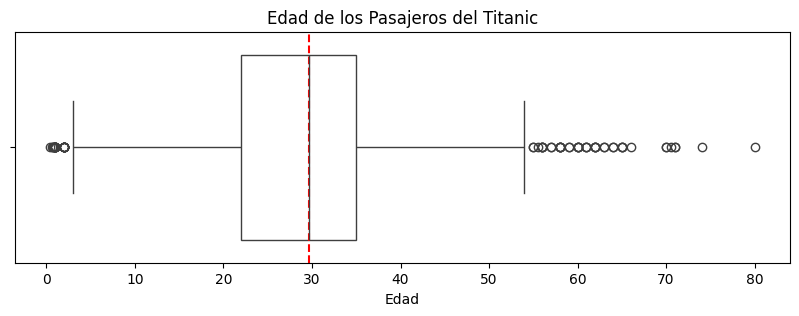

In [12]:
#Para presentar los datos en gráficos utilizaré el conjunto de entrenamiento
#Especificamente las columnas 'Age', 'Survived' y 'Sex'

#GRÁFICO N°1 Boxplot sobre la edad de los pasajeros"
plt.figure(figsize=(10, 3))
#Agregué la orientación en horizontal y fondo transparente de la caja, para mejor visualización de la distribución
sns.boxplot(x=df_train['Age'], orient='h', boxprops=dict(facecolor="None"))
#Además, agregué una línea roja para representar el promedio de las edades
promedio_edad = df_train['Age'].mean()
plt.axvline(promedio_edad, color='red', linestyle='--')
plt.title('Edad de los Pasajeros del Titanic')
plt.xlabel('Edad')
plt.show()

De acuerod con el boxplot resultante, la distribución de las edades de los pasajeros del Titanic muestra una simetría y centralidad bien notoria, ya que es posible observar una distribución relativamente uniforme de los datos a lo largo del rango intercuartílico. Donde, incluso, es posible evidencia que la media y la mediana se situan en el mismo punto, lo que sugiere una distribución simétrica en las edades, sin edades sesgadas hacia alguno de los extremos. Además, es posible ver que existe centralidad en las edades, donde el 50% de los pasajeros tenía una edad cercana a los 30 años, que es la edad que se encuentra en el medio de los extremos de las viñetas de la caja (rango intercuartil). Levemente se observa una concentración mayoritaria entre el percentil 25 y 75 que existían más pasajeros con edades >20 y < 35 aproximadamente.

En sintesis, se deduce que la distribución de las edades entre los pasajeros del Titanic es homogénea, con un promedio y mediana de aproximadamente 30 años.

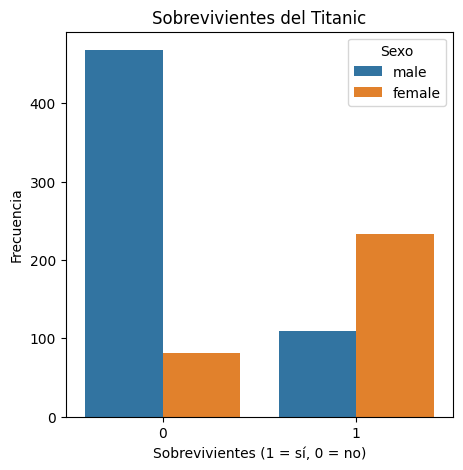

Frecuencia de Sobrevivientes por Sexo:
Survived    0    1
Sex               
female     81  233
male      468  109


In [27]:
#GRÁFICO N°2 Gráfico de barras sobre la sobrevivencia en relación al sexo de los pasajeros
#Creo el gráfico de barras y lo configuro con sus leyendas
plt.figure(figsize=(5, 5))
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.xlabel('Sobrevivientes (1 = sí, 0 = no)')
plt.ylabel('Frecuencia')
plt.title('Sobrevivientes del Titanic')
plt.legend(title='Sexo', loc='upper right')
plt.show()

#Además para entregar una conclusión más precisa calcularé los valores reales
#Para ello calculo la frecuencia de sobrevivientes por sexo
conteo_sobrevivientes = df_train.groupby(['Sex', 'Survived']).size().unstack()
#Finalmente imprimo los resultados numéricos
print("Frecuencia de Sobrevivientes por Sexo:")
print(conteo_sobrevivientes)

De acuerdo con los resultados obtenidos, es posible observar en el gráfico de barras que de los pasajeros sobrevivientes, la mayor cantidad eran mujeres. En particular, pese a que habían menos mujeres en el Titanic, 233 mujeres de ellas sobrevivieron. Mientras que de los hombres solo sobrevivieron 109 personas.

En sintesis, las mujeres evidenciaron mayor tasa de supervivencia por sobre los hombres en la catastrofe sucedida en el Titanic.

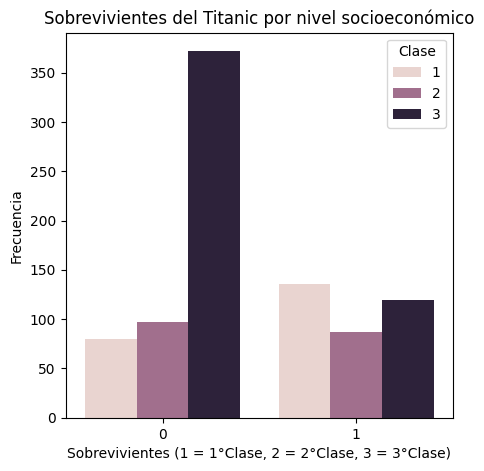

Frecuencia de Sobrevivientes por clase:
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [29]:
#GRÁFICO N°3 Gráfico de barras sobre la sobrevivencia en relación a la clase de los pasajeros
#Clase de billete, un indicador del nivel socioeconómico (1 = 1º, 2 = 2º, 3 = 3º).
#Creo el gráfico de barras y lo configuro con sus leyendas
plt.figure(figsize=(5, 5))
sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.xlabel('Sobrevivientes (1 = 1°Clase, 2 = 2°Clase, 3 = 3°Clase)')
plt.ylabel('Frecuencia')
plt.title('Sobrevivientes del Titanic por nivel socioeconómico')
plt.legend(title='Clase', loc='upper right')
plt.show()

#Además para entregar una conclusión más precisa calcularé los valores reales
#Para ello calculo la frecuencia de sobrevivientes por clase
conteo_sobrevivientes = df_train.groupby(['Survived', 'Pclass']).size().unstack()
#Finalmente imprimo los resultados numéricos
print("Frecuencia de Sobrevivientes por clase:")
print(conteo_sobrevivientes)

De acuerdo con el gráfico, es posible notar que la mayor cantidad de pasajeros que no sobrevivió a la catastrofe del Titanic, correspondían a pasajeros de la 3°clase (372), mientras que la mayoría de pasajeros que sobrevivieron fueron de 1°clase (136).

Es posible concluir que, en general, los pasajeros de primera clase tuvieron la mayor tasa de sobrevivencia en comparación con las demás clases. Es decir, que el nivel socioeconómico tuvo una gran influencia en la sobrevivencia de los pasajeros.

#RESPUESTA PREGUNTA N°4 y 5



```
4. Aprendizaje supervisado o Aprendizaje No supervisado: Utilice 2 algoritmos de datos de
cada aprendizaje de máquinas y vea cual entrega mejor rendimiento, con cual se quedaría
y registre sus conclusiones.
```




```
5. Modele sus datos, entrene y testee. Entregue sus conclusiones.
```


In [30]:
#PASO 1: PREPROCESAMIENTO DE DATOS
#Primero creo la variable para utilizar LabelEncoder() ya que quiero pasar las variables categóricas a numeros enteros
labelencoder = LabelEncoder()
#Aplico fit_transform() sobre los datos de entrenamiento y transform() sobre los de testeo después de ajustar los de entrenamiento
#Primero en la columna Sex
df_train['Sex'] = labelencoder.fit_transform(df_train['Sex'])
df_test['Sex'] = labelencoder.transform(df_test['Sex'])
#Luego en la columna Embarked
df_train['Embarked'] = labelencoder.fit_transform(df_train['Embarked'])
df_test['Embarked'] = labelencoder.transform(df_test['Embarked'])

#Ahora separo la característica y la variable objeto de nuestros df con los cuales aplicaremos los aprendizajes
#Se excluye la variable objeto 'Survived' que es lo que queremos predecir
#Mientras que 'Name' y 'Ticket' se consideran características porque son atributos que no proporcionan información útil que me ayude a predecir la sobrevivencia de los pasajeros
X = df_train.drop(columns=['Survived', 'Name', 'Ticket'])
y = df_train['Survived']

#Separo los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [32]:
#PASO 2: MODELAR Y ENTRENAR
#Realizo el análisis K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': np.arange(1, 31)}
knn_gs = GridSearchCV(knn, param_grid_knn, cv=5)
knn_gs.fit(X_train_scaled, y_train)
best_knn = knn_gs.best_estimator_

#Ahora realizo el entrenamiento del modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

#Ahora realizo el análisis Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#Realizo la optimización de los modelos
#Primero sobre KNN
param_grid_knn = {'n_neighbors': np.arange(1, 31)}
knn_gs = GridSearchCV(knn, param_grid_knn, cv=5)
knn_gs.fit(X_train_scaled, y_train)
best_knn = knn_gs.best_estimator_

#Despues sobre Random Forest
param_grid_rf = {'n_estimators': [10, 50, 100, 200]}
rf_gs = GridSearchCV(rf, param_grid_rf, cv=5)
rf_gs.fit(X_train, y_train)
best_rf = rf_gs.best_estimator_

#Realizo las predicciones del modelo
y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_rf = best_rf.predict(X_test)

#Análisis de la matriz de confusion de cada modelo
#KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n", cm_knn)
print("KNN Accuracy: ", acc_knn)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

#Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)
print("Random Forest Accuracy: ", acc_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

#Realizo la elección del modelo
if acc_knn > acc_rf:
    mejor_modelo = 'KNN'
    mejor_acc = acc_knn
else:
    mejor_modelo = 'Random Forest'
    mejor_acc = acc_rf

print(f"El mejor modelo es {mejor_modelo} con una precisión de {mejor_acc:.2f}")

#Imprimo las conclusiones finales
conclusiones = """
Conclusiones:
1. El modelo {} tuvo un mejor desempeño con una precisión de {:.2f}.
2. El conjunto de datos mostró características específicas que fueron bien capturadas por el modelo.
3. La optimización de hiperparámetros fue crucial para mejorar el rendimiento del modelo.
4. La cantidad de datos en la muestra y su relevancia para el negocio son factores importantes para asegurar la calidad del producto.
""".format(mejor_modelo, mejor_acc)

print(conclusiones)

KNN Confusion Matrix:
 [[93 12]
 [24 50]]
KNN Accuracy:  0.7988826815642458
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Random Forest Confusion Matrix:
 [[93 12]
 [19 55]]
Random Forest Accuracy:  0.8268156424581006
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

El mejor modelo es Random Forest con una precisión de 0.83

Conclusiones:
1. El modelo Random Forest tuvo un